## Семинар 2 "Распознавание рукописных цифр"

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
from torchvision.transforms import *
import numpy as np
from tqdm import tqdm
%matplotlib inline
from torch.autograd import Variable
import os
import torch
import pandas as pd
import random
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.figure()
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)
    plt.show()


# Подготовительная задача 1

Сделать из линейной регрессии nn.sequental двухслойную сеть

In [ ]:
nn.Sequential(nn.Linear(10, 20), nn.ReLU(), nn.Linear())

# Подготовительная задача 2

Используя структуру сети Sequental в pytorch реализовать и обучить классификатор цифр из MNIST
(повторить первый и второй пункты из прошлого задания )

In [ ]:
to_numpy = lambda x: x.numpy()
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=ToTensor())
test_dataset = MNIST('.', train=False, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100), 
    nn.Sigmoid(), 
    nn.Linear(100, 100), 
    nn.Sigmoid(), 
    nn.Linear(100, 10), 
    nn.Sigmoid()
)
loss = nn.NLLLoss()
opt = torch.optim.SGD(model.parameters(), lr=0.01)

train_loss = []
test_loss = []
for X, y in tqdm(train_loader):
    X = Variable(X.view(X.size(0), -1))
    y = Variable(y)
    pred = model.forward(X)
    loss_val = loss(pred, y)
    train_loss.append(loss_val.data.numpy())
    opt.zero_grad()
    loss_val.backward()
    opt.step()
    for Xtest, ytest in test_loader:
        Xtest = Variable(Xtest.view(Xtest.size(0), -1))
        ytest = Variable(ytest)
        pred = model.forward(Xtest)
        loss_val = loss(pred, ytest)
        test_loss.append(loss_val.data.numpy())
        break
    
train_loss = np.array(train_loss)
test_loss = np.array(test_loss)
plt.plot(train_loss)
plt.show()
plt.plot(test_loss)
plt.show()

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

model = nn.Sequential(
    nn.Linear(784, 100), 
    nn.ReLU(), 
    nn.Linear(100, 100), 
    nn.ReLU(), 
    nn.Linear(100, 10), 
    nn.Sigmoid()
)
loss = nn.NLLLoss()
opt = torch.optim.SGD(model.parameters(), lr=0.01)

train_loss = []
test_loss = []
for X, y in tqdm(train_loader):
    X = Variable(X.view(X.size(0), -1))
    y = Variable(y)
    pred = model.forward(X)
    loss_val = loss(pred, y)
    train_loss.append(loss_val.data.numpy())
    opt.zero_grad()
    loss_val.backward()
    opt.step()
    for Xtest, ytest in test_loader:
        Xtest = Variable(Xtest.view(Xtest.size(0), -1))
        ytest = Variable(ytest)
        pred = model.forward(Xtest)
        loss_val = loss(pred, ytest)
        test_loss.append(loss_val.data.numpy())
        break
    
train_loss = np.array(train_loss)
test_loss = np.array(test_loss)
plt.plot(train_loss)
plt.show()
plt.plot(test_loss)
plt.show()

## Задание

Используя датасет с особенными точками лица из лекции, разбейте данные на train / test и решите задачу регрессии для поиска 15-ти особых точек. Попробуйте сети глубины 1 и 2 и разные активации (ELU, RELU и sigmoid).

In [15]:
# Data routine... I have taken it from lecture)
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample[0], sample[1]
        h, w = image.shape[:2]
        new_h, new_w = self.output_size
        img = transform.resize(image, (new_h, new_w))
        landmarks = landmarks * [new_w / w, new_h / h]
        return img, landmarks
    

class MyDataset(Dataset):
    def __init__(self, csv_file, root_dir):
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.resc = Rescale((96, 96))
    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name) / 255.0
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        
        return self.resc((image, landmarks))



  0%|          | 0/104 [00:00<?, ?it/s]

  1%|          | 1/104 [00:00<00:35,  2.91it/s]

  2%|▏         | 2/104 [00:00<00:39,  2.61it/s]

  3%|▎         | 3/104 [00:01<00:41,  2.42it/s]

  4%|▍         | 4/104 [00:01<00:42,  2.35it/s]

  5%|▍         | 5/104 [00:02<00:43,  2.29it/s]

  6%|▌         | 6/104 [00:02<00:42,  2.31it/s]

  7%|▋         | 7/104 [00:03<00:43,  2.23it/s]

  8%|▊         | 8/104 [00:03<00:44,  2.14it/s]

  9%|▊         | 9/104 [00:04<00:43,  2.18it/s]

 10%|▉         | 10/104 [00:04<00:43,  2.17it/s]

 11%|█         | 11/104 [00:05<00:43,  2.16it/s]

 12%|█▏        | 12/104 [00:05<00:41,  2.19it/s]

 12%|█▎        | 13/104 [00:05<00:41,  2.19it/s]

 13%|█▎        | 14/104 [00:06<00:42,  2.13it/s]

 14%|█▍        | 15/104 [00:06<00:41,  2.15it/s]

 15%|█▌        | 16/104 [00:07<00:40,  2.16it/s]

 16%|█▋        | 17/104 [00:07<00:40,  2.17it/s]

 17%|█▋        | 18/104 [00:08<00:40,  2.11it/s]

 18%|█▊        | 19/104 [00:08<00:38,  2.20it/s]

 19%|█▉        |

 39%|███▉      | 41/104 [00:18<00:28,  2.20it/s]

 40%|████      | 42/104 [00:18<00:27,  2.22it/s]

 41%|████▏     | 43/104 [00:19<00:27,  2.21it/s]

 42%|████▏     | 44/104 [00:19<00:27,  2.17it/s]

 43%|████▎     | 45/104 [00:20<00:27,  2.18it/s]

 44%|████▍     | 46/104 [00:20<00:26,  2.23it/s]

 45%|████▌     | 47/104 [00:21<00:26,  2.16it/s]

 46%|████▌     | 48/104 [00:21<00:24,  2.26it/s]

 47%|████▋     | 49/104 [00:21<00:24,  2.25it/s]

 48%|████▊     | 50/104 [00:22<00:23,  2.26it/s]

 49%|████▉     | 51/104 [00:22<00:22,  2.32it/s]

 50%|█████     | 52/104 [00:23<00:22,  2.27it/s]

 51%|█████     | 53/104 [00:23<00:22,  2.23it/s]

 52%|█████▏    | 54/104 [00:24<00:21,  2.32it/s]

 53%|█████▎    | 55/104 [00:24<00:21,  2.28it/s]

 54%|█████▍    | 56/104 [00:24<00:20,  2.34it/s]

 55%|█████▍    | 57/104 [00:25<00:20,  2.26it/s]

 56%|█████▌    | 58/104 [00:25<00:20,  2.27it/s]

 57%|█████▋    | 59/104 [00:26<00:19,  2.26it/s]

 58%|█████▊    | 60/104 [00:26<00:18,  2.33it/s]



 79%|███████▉  | 82/104 [00:37<00:10,  2.15it/s]

 80%|███████▉  | 83/104 [00:37<00:09,  2.24it/s]

 81%|████████  | 84/104 [00:37<00:09,  2.19it/s]

 82%|████████▏ | 85/104 [00:38<00:08,  2.32it/s]

 83%|████████▎ | 86/104 [00:38<00:07,  2.35it/s]

 84%|████████▎ | 87/104 [00:39<00:07,  2.28it/s]

 85%|████████▍ | 88/104 [00:39<00:07,  2.25it/s]

 86%|████████▌ | 89/104 [00:40<00:06,  2.24it/s]

 87%|████████▋ | 90/104 [00:40<00:06,  2.19it/s]

 88%|████████▊ | 91/104 [00:41<00:05,  2.23it/s]

 88%|████████▊ | 92/104 [00:41<00:05,  2.26it/s]

 89%|████████▉ | 93/104 [00:41<00:05,  2.17it/s]

 90%|█████████ | 94/104 [00:42<00:04,  2.20it/s]

 91%|█████████▏| 95/104 [00:42<00:04,  2.24it/s]

 92%|█████████▏| 96/104 [00:43<00:03,  2.18it/s]

 93%|█████████▎| 97/104 [00:43<00:03,  2.09it/s]

 94%|█████████▍| 98/104 [00:44<00:02,  2.05it/s]

 95%|█████████▌| 99/104 [00:44<00:02,  1.97it/s]

 96%|█████████▌| 100/104 [00:45<00:02,  1.98it/s]

 97%|█████████▋| 101/104 [00:45<00:01,  2.11it/s]

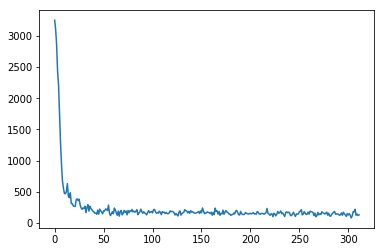

In [37]:
N = 10000
B = 10
train_data = MyDataset(
    '/home/delta37/sphere/nn/3_new/dataset/train/face_landmarks.csv', 
    '/home/delta37/sphere/nn/3_new/dataset/train'
)
test_data = MyDataset(
    '/home/delta37/sphere/nn/3_new/dataset/test/face_landmarks.csv', 
    '/home/delta37/sphere/nn/3_new/dataset/test'
)
train_loader = DataLoader(train_data, shuffle=True, batch_size=60)
test_loader = DataLoader(test_data, shuffle=True, batch_size=1)

model = nn.Sequential(
    nn.Linear(9216, 300), 
    nn.ReLU(), 
    nn.Linear(300, 2 * 68), 
)

loss = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001)
train_loss = []
for i in range(3):
    for X, y in tqdm(train_loader):
        X = X.view(-1, 9216).float()
        y = y.view(-1, 2 * 68).float()
        #show_landmarks(X[0].numpy().reshape(96, 96), y[0].numpy().reshape((-1, 2)))
        #break
        X = Variable(X, requires_grad=False)
        y = Variable(y, requires_grad=False)

        pred = model(X)
        loss_val = loss(pred, y)
        train_loss.append(loss_val.data.numpy())
        opt.zero_grad()
        loss_val.backward()
        opt.step()
    
train_loss = np.array(train_loss)
plt.plot(train_loss)
plt.show()

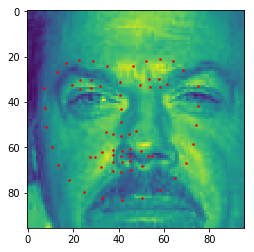

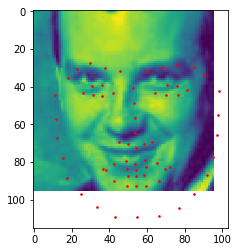

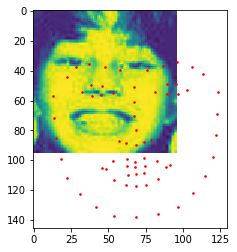

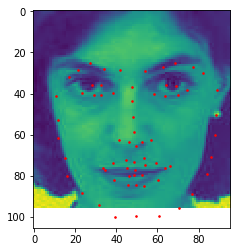

In [38]:
test_loss = []
i = 0
for X, y in test_loader:
        X_train = X.view(X.size(0), -1).float()
        y = y.view(y.size(0), -1).float()

        X_train = Variable(X_train, requires_grad=False)
        y = Variable(y, requires_grad=False)

        pred = model(X_train)
        loss_val = loss(pred, y)
        test_loss.append(loss_val.data.numpy())
        
        show_landmarks(X.numpy().reshape(96, 96), pred.data.numpy().reshape((-1, 2)))
        if (i >= 3):
            break
        i += 1



  0%|          | 0/104 [00:00<?, ?it/s]

  1%|          | 1/104 [00:00<00:48,  2.14it/s]

  2%|▏         | 2/104 [00:01<00:50,  2.04it/s]

  3%|▎         | 3/104 [00:01<00:49,  2.03it/s]

  4%|▍         | 4/104 [00:01<00:48,  2.05it/s]

  5%|▍         | 5/104 [00:02<00:50,  1.95it/s]

  6%|▌         | 6/104 [00:03<00:49,  1.98it/s]

  7%|▋         | 7/104 [00:03<00:48,  2.00it/s]

  8%|▊         | 8/104 [00:03<00:46,  2.06it/s]

  9%|▊         | 9/104 [00:04<00:46,  2.06it/s]

 10%|▉         | 10/104 [00:04<00:44,  2.10it/s]

 11%|█         | 11/104 [00:05<00:44,  2.09it/s]

 12%|█▏        | 12/104 [00:05<00:43,  2.10it/s]

 12%|█▎        | 13/104 [00:06<00:41,  2.18it/s]

 13%|█▎        | 14/104 [00:06<00:43,  2.09it/s]

 14%|█▍        | 15/104 [00:07<00:46,  1.92it/s]

 15%|█▌        | 16/104 [00:07<00:44,  1.99it/s]

 16%|█▋        | 17/104 [00:08<00:43,  2.00it/s]

 17%|█▋        | 18/104 [00:08<00:44,  1.95it/s]

 18%|█▊        | 19/104 [00:09<00:43,  1.94it/s]

 19%|█▉        |

 39%|███▉      | 41/104 [00:21<00:31,  2.00it/s]

 40%|████      | 42/104 [00:21<00:30,  2.01it/s]

 41%|████▏     | 43/104 [00:21<00:29,  2.05it/s]

 42%|████▏     | 44/104 [00:22<00:28,  2.09it/s]

 43%|████▎     | 45/104 [00:22<00:28,  2.10it/s]

 44%|████▍     | 46/104 [00:23<00:27,  2.09it/s]

 45%|████▌     | 47/104 [00:23<00:28,  2.03it/s]

 46%|████▌     | 48/104 [00:24<00:27,  2.02it/s]

 47%|████▋     | 49/104 [00:24<00:27,  1.99it/s]

 48%|████▊     | 50/104 [00:25<00:26,  2.03it/s]

 49%|████▉     | 51/104 [00:25<00:25,  2.10it/s]

 50%|█████     | 52/104 [00:26<00:25,  2.07it/s]

 51%|█████     | 53/104 [00:26<00:24,  2.06it/s]

 52%|█████▏    | 54/104 [00:27<00:24,  2.06it/s]

 53%|█████▎    | 55/104 [00:27<00:23,  2.07it/s]

 54%|█████▍    | 56/104 [00:28<00:23,  2.06it/s]

 55%|█████▍    | 57/104 [00:28<00:22,  2.08it/s]

 56%|█████▌    | 58/104 [00:29<00:22,  2.06it/s]

 57%|█████▋    | 59/104 [00:29<00:21,  2.08it/s]

 58%|█████▊    | 60/104 [00:30<00:21,  2.08it/s]



 79%|███████▉  | 82/104 [00:39<00:10,  2.12it/s]

 80%|███████▉  | 83/104 [00:40<00:10,  2.10it/s]

 81%|████████  | 84/104 [00:40<00:09,  2.14it/s]

 82%|████████▏ | 85/104 [00:41<00:08,  2.13it/s]

 83%|████████▎ | 86/104 [00:41<00:08,  2.12it/s]

 84%|████████▎ | 87/104 [00:41<00:07,  2.14it/s]

 85%|████████▍ | 88/104 [00:42<00:07,  2.16it/s]

 86%|████████▌ | 89/104 [00:42<00:06,  2.17it/s]

 87%|████████▋ | 90/104 [00:43<00:06,  2.15it/s]

 88%|████████▊ | 91/104 [00:43<00:06,  2.14it/s]

 88%|████████▊ | 92/104 [00:44<00:05,  2.14it/s]

 89%|████████▉ | 93/104 [00:44<00:05,  2.13it/s]

 90%|█████████ | 94/104 [00:45<00:04,  2.15it/s]

 91%|█████████▏| 95/104 [00:45<00:04,  2.18it/s]

 92%|█████████▏| 96/104 [00:46<00:03,  2.19it/s]

 93%|█████████▎| 97/104 [00:46<00:03,  2.17it/s]

 94%|█████████▍| 98/104 [00:47<00:02,  2.15it/s]

 95%|█████████▌| 99/104 [00:47<00:02,  2.15it/s]

 96%|█████████▌| 100/104 [00:47<00:01,  2.12it/s]

 97%|█████████▋| 101/104 [00:48<00:01,  2.21it/s]

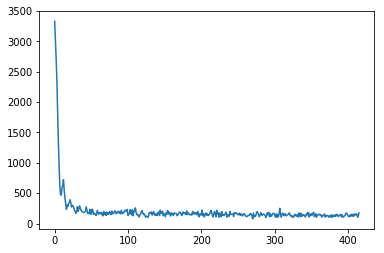

In [39]:
train_data = MyDataset(
    '/home/delta37/sphere/nn/3_new/dataset/train/face_landmarks.csv', 
    '/home/delta37/sphere/nn/3_new/dataset/train'
)
test_data = MyDataset(
    '/home/delta37/sphere/nn/3_new/dataset/test/face_landmarks.csv', 
    '/home/delta37/sphere/nn/3_new/dataset/test'
)
train_loader = DataLoader(train_data, shuffle=True, batch_size=60)
test_loader = DataLoader(test_data, shuffle=True, batch_size=1)

model = nn.Sequential(
    nn.Linear(9216, 400), 
    nn.ReLU(), 
    nn.Linear(400, 2 * 68), 
)

loss = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001)
train_loss = []
for i in range(4):
    for X, y in tqdm(train_loader):
        X = X.view(-1, 9216).float()
        y = y.view(-1, 2 * 68).float()
        #show_landmarks(X[0].numpy().reshape(96, 96), y[0].numpy().reshape((-1, 2)))
        #break
        X = Variable(X, requires_grad=False)
        y = Variable(y, requires_grad=False)

        pred = model(X)
        loss_val = loss(pred, y)
        train_loss.append(loss_val.data.numpy())
        opt.zero_grad()
        loss_val.backward()
        opt.step()
    
train_loss = np.array(train_loss)
plt.plot(train_loss)
plt.show()

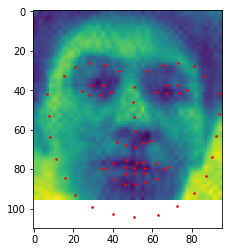

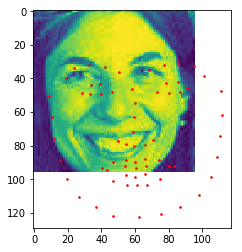

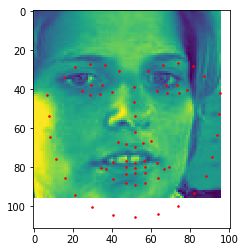

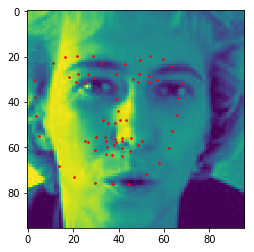

In [40]:
test_loss = []
i = 0
for X, y in test_loader:
        X_train = X.view(X.size(0), -1).float()
        y = y.view(y.size(0), -1).float()

        X_train = Variable(X_train, requires_grad=False)
        y = Variable(y, requires_grad=False)

        pred = model(X_train)
        loss_val = loss(pred, y)
        test_loss.append(loss_val.data.numpy())
        
        show_landmarks(X.numpy().reshape(96, 96), pred.data.numpy().reshape((-1, 2)))
        if (i >= 3):
            break
        i += 1